# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('C://Berly/ML/Assignments_DonorsChoose_2018/train_data.csv')
resource_data = pd.read_csv('C://Berly/ML/Assignments_DonorsChoose_2018/resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)
project_data.head(2)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [6]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories  
0        23             Literacy_Language  
1         1  History_Civics Health_Sports

## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 Preprocessing of project_grade_category

In [10]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
# similarly you can preprocess the project grade category also
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_grade = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_grade_category'].values):
    sent = decontracted(sentance)
    sent=sent.replace('Grades'," ")

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 87821.86it/s]


In [12]:
#Preprocessing needed for categorial item grade 

grade_catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python



grade_cat_list = []
for i in grade_catogories:
    temp = ""
   #splitting values in the list for getting grades
    for j in i.split(','): # it will split 
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp=temp.rstrip(' ')#
        temp = temp.replace('-','_')
        temp = temp.replace(' ','_')#replacing spaces
        
    grade_cat_list.append(temp.strip())
    

In [13]:
#inserting  processed grade category into project data and dropping old column
project_data['clean_grade'] = grade_cat_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

     clean_grade  
0  Grades_PreK_2  
1     Grades_6_8

## 1.5 Preprocessing of teacher-prefix

In [14]:
#Preprocessing needed for categorial item grade 

prefix_catogories = list((project_data['teacher_prefix']).values)

# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

prefix_cat_list = []

for i in prefix_catogories:
    temp = ""
   #splitting values in the list for getting grades
    for j in str(i).split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('nan',' ')#replacing spaces
    prefix_cat_list.append(temp.strip())

In [15]:
#inserting  processed prefix category into project data and dropping old column

project_data['clean_prefix'] = prefix_cat_list
project_data.drop(['teacher_prefix'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

     clean_grade clean_prefix  
0  Grades_PreK_2         Mrs.  
1     Grades_6_8          Mr.

## 1.6 Text preprocessing-Project Essay

In [16]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [17]:
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

     clean_grade clean_prefix  \
0  Grades_PreK_2         Mrs.   
1     Grades_6_8          Mr.   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [18]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [19]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [20]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [21]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [22]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [23]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [24]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [25]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:25<00:00, 1277.16it/s]


In [26]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='black'> 1.6 Preprocessing of `project_title`</font></h2>

In [27]:
# printing some random titles.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year
We Need To Move It While We Input It!
Inspiring Minds by Enhancing the Educational Experience


In [28]:
# similarly you can preprocess the titles also
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('!@#$%^&*()[]{};:,./<>?\|`~-=_+', ' ')
    
    
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 29534.37it/s]


In [29]:
# printing some random titles after text preprocessing.
print(preprocessed_title[0])
print("="*50)
print(preprocessed_title[150])
print("="*50)
print(preprocessed_title[1000])
print("="*50)
print(preprocessed_title[20000])
print("="*50)
print(preprocessed_title[99999])
print("="*50)

educational support english learners home
more movement hokki stools
sailing into super 4th grade year
we need to move it while we input it
inspiring minds enhancing educational experience


In [30]:
#Adding processed columns at place of original columns
project_data['clean_essays'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

In [31]:
#Adding processed title as clean title in project
project_data['clean_title'] = preprocessed_title

In [32]:
#Printing data count in project data
print(project_data.count())

#Because of memory constraints linear sampling of whole data and considering 50 k data for analysis
#project_data=project_data.sample(n=50000,replace="False")
#print("*"*50)
#print(project_data.count())

Unnamed: 0                                      109248
id                                              109248
teacher_id                                      109248
school_state                                    109248
project_submitted_datetime                      109248
project_title                                   109248
project_resource_summary                        109248
teacher_number_of_previously_posted_projects    109248
project_is_approved                             109248
price                                           109248
quantity                                        109248
clean_categories                                109248
clean_subcategories                             109248
clean_grade                                     109248
clean_prefix                                    109248
essay                                           109248
clean_essays                                    109248
clean_title                                     109248
dtype: int

In [33]:
#To view count of data set in each class for approved and rejected projects

filtered_negative = project_data.loc[project_data['project_is_approved'] == 0]
filtered_positive = project_data.loc[project_data['project_is_approved'] == 1]
print(filtered_negative.count())
print(filtered_positive.count())

Unnamed: 0                                      16542
id                                              16542
teacher_id                                      16542
school_state                                    16542
project_submitted_datetime                      16542
project_title                                   16542
project_resource_summary                        16542
teacher_number_of_previously_posted_projects    16542
project_is_approved                             16542
price                                           16542
quantity                                        16542
clean_categories                                16542
clean_subcategories                             16542
clean_grade                                     16542
clean_prefix                                    16542
essay                                           16542
clean_essays                                    16542
clean_title                                     16542
dtype: int64
Unnamed: 0     

# Summary

Results showing most of the project is approved

## 2.Splitting of data

In [34]:
print(project_data.shape)

project_data = project_data.sample(frac=0.3)

print(project_data.shape)

(109248, 18)
(32774, 18)


In [35]:
#finding the possible values for project approval.results shows if project is approved it will show 1 and rejected shows 0
y = project_data['project_is_approved'].values
#Dropping the column project approved from project data
project_data.drop(['project_is_approved'], axis=1, inplace=True)
X = project_data
#Projecting project data to see whether is project_is_approved column is there or not
X.head(2)

Unnamed: 0       id                        teacher_id school_state  \
90292      118095  p006212  2e2d096e043cf658ead8ce0aaee5a297           AZ   
80425      101813  p241384  6e54511acd15dd2d843dfc32ec7d326f           OR   

      project_submitted_datetime                                project_title  \
90292        2016-12-13 10:06:18  Help Students Access the Content They Need!   
80425        2017-01-14 22:42:43                   ELL Students Need a Laptop   

                                project_resource_summary  \
90292  My students need and iPad 3rd generation along...   
80425  My students need a laptop to gain access to vi...   

       teacher_number_of_previously_posted_projects   price  quantity  \
90292                                             4  359.98         2   
80425                                             1  184.18         1   

        clean_categories clean_subcategories    clean_grade clean_prefix  \
90292       Math_Science         Mathematics     Grades_6_8         Mrs.   
80425  Literacy_Language        ESL Literacy  Grades_PreK_2          Ms.   

                                                   essay  \
90292  I teach in a small, K-8 school in Phoenix, Ari...   
80425  My elementary students in the English Language...   

                                            clean_essays  \
90292  i teach small k 8 school phoenix arizona our s...   
80425  my elementary students english language develo...   

                                  clean_title  
90292  help students access content they need  
80425                ell students need laptop

In [36]:

#Splitting of data set into train test and cv after precprocessing.if this is done before pre processing data leakage will happen
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)
#printing sample count of train,test and cv data for column id
print(X_train['id'].count())
print(X_test['id'].count())
print(X_cv['id'].count())
#Sample value of y in all types of data
print(y_train)
print(y_test)
print(y_cv)




14711
10816
7247
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [37]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(14711, 17) (14711,)
(7247, 17) (7247,)
(10816, 17) (10816,)


## 3 Vectorizing data 

### 3.1 Vectorizing Categorical data

In [38]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price', 'quantity',
       'clean_categories', 'clean_subcategories', 'clean_grade',
       'clean_prefix', 'essay', 'clean_essays', 'clean_title'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 3.1 Vectorizing Categorical data

In [39]:
def calculate_proba_score_of_each_variable(data, classLabel):
    '''
    Function to return probability score
    Return Dict 'LA': {'pos': 0.8267790262172284, 'neg': 0.17322097378277154}
    '''
    positive_score_dict = {}
    negative_score_dict = {}
    distinct_feature = []
    # Collect negative and positive scores of a class label
    for i in range(len(data)):
        # Collect distinct features
        if(data[i] not in distinct_feature):
            distinct_feature.append(data[i])
        if(1 == classLabel[i]):
            if(data[i] in positive_score_dict):
                positive_score_dict[data[i]] = positive_score_dict[data[i]] + 1
            else:
                positive_score_dict[data[i]] = 1
        else:
            if(data[i] in negative_score_dict):
                negative_score_dict[data[i]] = negative_score_dict[data[i]] + 1 
            else:
                negative_score_dict[data[i]] = 1
                
#     print(positive_score_dict, negative_score_dict)

    # Collect probability score
    prob_score = {}
    for i in range(len(distinct_feature)):
#         print(distinct_feature[i])
        pos_score = 0
        neg_score = 0
        if(distinct_feature[i] in positive_score_dict):
            pos_score = positive_score_dict[distinct_feature[i]]
        if(distinct_feature[i] in negative_score_dict):
            neg_score = negative_score_dict[distinct_feature[i]]
            
        prob_score[distinct_feature[i]] = {"pos" : (pos_score/(pos_score+neg_score)), "neg" : (neg_score/(pos_score+neg_score))}
#         print(prob_score)  
    return prob_score


def convert_response_encoding(data, proba_score):
    '''
    Convert feature into response encoding 
    Return Lists
    '''
    result_pos = []
    result_neg = []
    for i in range(len(data)):
        if((data[i] in proba_score)):
            result_pos.append(proba_score[data[i]]['pos'])
            result_neg.append(proba_score[data[i]]['neg'])
        else:#handle missing data
            result_pos.append(0.5)
            result_neg.append(0.5)
            
    return [result_pos, result_neg]

In [40]:
# We are using response encoding instead of one hot encoding for categorical feature
from scipy.sparse import coo_matrix


# calculate response encoding on school_state train data i.e. fit data
proba_score_train = calculate_proba_score_of_each_variable(X_train['school_state'].values, y_train)

# transform train data
response_encoding_train_pos, response_encoding_train_neg = convert_response_encoding(X_train['school_state'].values, proba_score_train)

response_encoding_train_pos = pd.DataFrame(response_encoding_train_pos)
response_encoding_train_neg = pd.DataFrame(response_encoding_train_neg)

# transform cv data
response_encoding_cv_pos, response_encoding_cv_neg = convert_response_encoding(X_cv['school_state'].values, proba_score_train)

response_encoding_cv_pos = pd.DataFrame(response_encoding_cv_pos)
response_encoding_cv_neg = pd.DataFrame(response_encoding_cv_neg)

# transform test data
response_encoding_test_pos, response_encoding_test_neg = convert_response_encoding(X_test['school_state'].values, proba_score_train)

response_encoding_test_pos = pd.DataFrame(response_encoding_test_pos)
response_encoding_test_neg = pd.DataFrame(response_encoding_test_neg)

# reshape data
X_train_school_state_pos = response_encoding_train_pos.values.reshape(-1,1)
X_train_school_state_neg = response_encoding_train_neg.values.reshape(-1,1)
X_cv_school_state_pos = response_encoding_cv_pos.values.reshape(-1,1)
X_cv_school_state_neg = response_encoding_cv_neg.values.reshape(-1,1)
X_test_school_state_pos = response_encoding_test_pos.values.reshape(-1,1)
X_test_school_state_neg = response_encoding_test_neg.values.reshape(-1,1)

# print data to do some verification
print(X_train_school_state_pos.shape, y_train.shape)
print(X_train_school_state_neg.shape, y_train.shape)
print(X_cv_school_state_pos.shape, y_cv.shape)
print(X_cv_school_state_neg.shape, y_cv.shape)
print(X_test_school_state_pos.shape, y_test.shape)
print(X_test_school_state_neg.shape, y_test.shape)
print('*'*100)
print('train data positive')
print(X_train_school_state_pos[0:5])
print('*'*100)
print('train data negative')
print(X_train_school_state_neg[0:5])
print('*'*100)
print('cv data positive')
print(X_cv_school_state_pos[0:5])
print('*'*100)
print('cv data negative')
print(X_cv_school_state_neg[0:5])
print('*'*100)
print('test data positive')
print(X_test_school_state_pos[0:5])
print('*'*100)
print('test data negative')
print(X_test_school_state_neg[0:5])
print('*'*100)


X_train_school_state_pos = coo_matrix(X_train_school_state_pos)
X_train_school_state_neg = coo_matrix(X_train_school_state_neg)
X_cv_school_state_pos = coo_matrix(X_cv_school_state_pos)
X_cv_school_state_neg = coo_matrix(X_cv_school_state_neg)
X_test_school_state_pos = coo_matrix(X_test_school_state_pos)
X_test_school_state_neg = coo_matrix(X_test_school_state_neg)

# print csr matrix shape
print(X_train_school_state_pos.shape, y_train.shape)
print(X_train_school_state_neg.shape, y_train.shape)
print(X_cv_school_state_pos.shape, y_cv.shape)
print(X_cv_school_state_neg.shape, y_cv.shape)
print(X_test_school_state_pos.shape, y_test.shape)
print(X_test_school_state_neg.shape, y_test.shape)
print('*'*100)

(14711, 1) (14711,)
(14711, 1) (14711,)
(7247, 1) (7247,)
(7247, 1) (7247,)
(10816, 1) (10816,)
(10816, 1) (10816,)
****************************************************************************************************
train data positive
[[0.84152216]
 [0.88461538]
 [0.79676441]
 [0.87198068]
 [0.82857143]]
****************************************************************************************************
train data negative
[[0.15847784]
 [0.11538462]
 [0.20323559]
 [0.12801932]
 [0.17142857]]
****************************************************************************************************
cv data positive
[[0.86086957]
 [0.84745763]
 [0.87078652]
 [0.87366548]
 [0.79676441]]
****************************************************************************************************
cv data negative
[[0.13913043]
 [0.15254237]
 [0.12921348]
 [0.12633452]
 [0.20323559]]
****************************************************************************************************
test data positive
[[

In [41]:
# We are using response encoding instead of one hot encoding for categorical feature
# - clean_categories : categorical data

# calculate response encoding on clean_categories train data i.e. fit data
proba_score_train = calculate_proba_score_of_each_variable(X_train['clean_categories'].values, y_train)

# transform train data
response_encoding_train_pos, response_encoding_train_neg = convert_response_encoding(X_train['clean_categories'].values, proba_score_train)

response_encoding_train_pos = pd.DataFrame(response_encoding_train_pos)
response_encoding_train_neg = pd.DataFrame(response_encoding_train_neg)

# transform cv data
response_encoding_cv_pos, response_encoding_cv_neg = convert_response_encoding(X_cv['clean_categories'].values, proba_score_train)

response_encoding_cv_pos = pd.DataFrame(response_encoding_cv_pos)
response_encoding_cv_neg = pd.DataFrame(response_encoding_cv_neg)

# transform test data
response_encoding_test_pos, response_encoding_test_neg = convert_response_encoding(X_test['clean_categories'].values, proba_score_train)

response_encoding_test_pos = pd.DataFrame(response_encoding_test_pos)
response_encoding_test_neg = pd.DataFrame(response_encoding_test_neg)

# reshape data
X_train_clean_categories_pos = response_encoding_train_pos.values.reshape(-1,1)
X_train_clean_categories_neg = response_encoding_train_neg.values.reshape(-1,1)
X_cv_clean_categories_pos = response_encoding_cv_pos.values.reshape(-1,1)
X_cv_clean_categories_neg = response_encoding_cv_neg.values.reshape(-1,1)
X_test_clean_categories_pos = response_encoding_test_pos.values.reshape(-1,1)
X_test_clean_categories_neg = response_encoding_test_neg.values.reshape(-1,1)

# print data to do some verification
print(X_train_clean_categories_pos.shape, y_train.shape)
print(X_train_clean_categories_neg.shape, y_train.shape)
print(X_cv_clean_categories_pos.shape, y_cv.shape)
print(X_cv_clean_categories_neg.shape, y_cv.shape)
print(X_test_clean_categories_pos.shape, y_test.shape)
print(X_test_clean_categories_neg.shape, y_test.shape)
print('*'*100)
print('train data positive')
print(X_train_clean_categories_pos[0:5])
print('*'*100)
print('train data negative')
print(X_train_clean_categories_neg[0:5])
print('*'*100)
print('cv data positive')
print(X_cv_clean_categories_pos[0:5])
print('*'*100)
print('cv data negative')
print(X_cv_clean_categories_neg[0:5])
print('*'*100)
print('test data positive')
print(X_test_clean_categories_pos[0:5])
print('*'*100)
print('test data negative')
print(X_test_clean_categories_neg[0:5])
print('*'*100)


X_train_clean_categories_pos = coo_matrix(X_train_clean_categories_pos)
X_train_clean_categories_neg = coo_matrix(X_train_clean_categories_neg)
X_cv_clean_categories_pos = coo_matrix(X_cv_clean_categories_pos)
X_cv_clean_categories_neg = coo_matrix(X_cv_clean_categories_neg)
X_test_clean_categories_pos = coo_matrix(X_test_clean_categories_pos)
X_test_clean_categories_neg = coo_matrix(X_test_clean_categories_neg)

# print csr matrix shape
print(X_train_clean_categories_pos.shape, y_train.shape)
print(X_train_clean_categories_neg.shape, y_train.shape)
print(X_cv_clean_categories_pos.shape, y_cv.shape)
print(X_cv_clean_categories_neg.shape, y_cv.shape)
print(X_test_clean_categories_pos.shape, y_test.shape)
print(X_test_clean_categories_neg.shape, y_test.shape)
print('*'*100)

(14711, 1) (14711,)
(14711, 1) (14711,)
(7247, 1) (7247,)
(7247, 1) (7247,)
(10816, 1) (10816,)
(10816, 1) (10816,)
****************************************************************************************************
train data positive
[[0.87760284]
 [0.88888889]
 [0.80703986]
 [0.87760284]
 [0.80703986]]
****************************************************************************************************
train data negative
[[0.12239716]
 [0.11111111]
 [0.19296014]
 [0.12239716]
 [0.19296014]]
****************************************************************************************************
cv data positive
[[0.80703986]
 [0.80703986]
 [0.84603774]
 [0.80703986]
 [0.86330935]]
****************************************************************************************************
cv data negative
[[0.19296014]
 [0.19296014]
 [0.15396226]
 [0.19296014]
 [0.13669065]]
****************************************************************************************************
test data positive
[[

In [42]:
# We are using response encoding instead of one hot encoding for categorical feature
# - clean_categories : categorical data
# calculate response encoding on clean_subcategories train data i.e. fit data
proba_score_train = calculate_proba_score_of_each_variable(X_train['clean_subcategories'].values, y_train)

# transform train data
response_encoding_train_pos, response_encoding_train_neg = convert_response_encoding(X_train['clean_subcategories'].values, proba_score_train)

response_encoding_train_pos = pd.DataFrame(response_encoding_train_pos)
response_encoding_train_neg = pd.DataFrame(response_encoding_train_neg)

# transform cv data
response_encoding_cv_pos, response_encoding_cv_neg = convert_response_encoding(X_cv['clean_subcategories'].values, proba_score_train)

response_encoding_cv_pos = pd.DataFrame(response_encoding_cv_pos)
response_encoding_cv_neg = pd.DataFrame(response_encoding_cv_neg)

# transform test data
response_encoding_test_pos, response_encoding_test_neg = convert_response_encoding(X_test['clean_subcategories'].values, proba_score_train)

response_encoding_test_pos = pd.DataFrame(response_encoding_test_pos)
response_encoding_test_neg = pd.DataFrame(response_encoding_test_neg)

# reshape data
X_train_clean_subcategories_pos = response_encoding_train_pos.values.reshape(-1,1)
X_train_clean_subcategories_neg = response_encoding_train_neg.values.reshape(-1,1)
X_cv_clean_subcategories_pos = response_encoding_cv_pos.values.reshape(-1,1)
X_cv_clean_subcategories_neg = response_encoding_cv_neg.values.reshape(-1,1)
X_test_clean_subcategories_pos = response_encoding_test_pos.values.reshape(-1,1)
X_test_clean_subcategories_neg = response_encoding_test_neg.values.reshape(-1,1)

# print data to do some verification
print(X_train_clean_subcategories_pos.shape, y_train.shape)
print(X_train_clean_subcategories_neg.shape, y_train.shape)
print(X_cv_clean_subcategories_pos.shape, y_cv.shape)
print(X_cv_clean_subcategories_neg.shape, y_cv.shape)
print(X_test_clean_subcategories_pos.shape, y_test.shape)
print(X_test_clean_subcategories_neg.shape, y_test.shape)
print('*'*100)
print('train data positive')
print(X_train_clean_subcategories_pos[0:5])
print('*'*100)
print('train data negative')
print(X_train_clean_subcategories_neg[0:5])
print('*'*100)
print('cv data positive')
print(X_cv_clean_subcategories_pos[0:5])
print('*'*100)
print('cv data negative')
print(X_cv_clean_subcategories_neg[0:5])
print('*'*100)
print('test data positive')
print(X_test_clean_subcategories_pos[0:5])
print('*'*100)
print('test data negative')
print(X_test_clean_subcategories_neg[0:5])
print('*'*100)


X_train_clean_subcategories_pos = coo_matrix(X_train_clean_subcategories_pos)
X_train_clean_subcategories_neg = coo_matrix(X_train_clean_subcategories_neg)
X_cv_clean_subcategories_pos = coo_matrix(X_cv_clean_subcategories_pos)
X_cv_clean_subcategories_neg = coo_matrix(X_cv_clean_subcategories_neg)
X_test_clean_subcategories_pos = coo_matrix(X_test_clean_subcategories_pos)
X_test_clean_subcategories_neg = coo_matrix(X_test_clean_subcategories_neg)

# print csr matrix shape
print(X_train_clean_subcategories_pos.shape, y_train.shape)
print(X_train_clean_subcategories_neg.shape, y_train.shape)
print(X_cv_clean_subcategories_pos.shape, y_cv.shape)
print(X_cv_clean_subcategories_neg.shape, y_cv.shape)
print(X_test_clean_subcategories_pos.shape, y_test.shape)
print(X_test_clean_subcategories_neg.shape, y_test.shape)
print('*'*100)

(14711, 1) (14711,)
(14711, 1) (14711,)
(7247, 1) (7247,)
(7247, 1) (7247,)
(10816, 1) (10816,)
(10816, 1) (10816,)
****************************************************************************************************
train data positive
[[0.87798408]
 [0.86666667]
 [0.81903485]
 [0.87225806]
 [0.81903485]]
****************************************************************************************************
train data negative
[[0.12201592]
 [0.13333333]
 [0.18096515]
 [0.12774194]
 [0.18096515]]
****************************************************************************************************
cv data positive
[[0.81903485]
 [0.80167598]
 [0.78431373]
 [0.82937365]
 [0.82958199]]
****************************************************************************************************
cv data negative
[[0.18096515]
 [0.19832402]
 [0.21568627]
 [0.17062635]
 [0.17041801]]
****************************************************************************************************
test data positive
[[

In [43]:
# We are using response encoding instead of one hot encoding for categorical feature
# - project_grade_category : categorical data
# calculate response encoding on project_grade_category train data i.e. fit data
proba_score_train = calculate_proba_score_of_each_variable(X_train['clean_grade'].values, y_train)

# transform train data
response_encoding_train_pos, response_encoding_train_neg = convert_response_encoding(X_train['clean_grade'].values, proba_score_train)

response_encoding_train_pos = pd.DataFrame(response_encoding_train_pos)
response_encoding_train_neg = pd.DataFrame(response_encoding_train_neg)

# transform cv data
response_encoding_cv_pos, response_encoding_cv_neg = convert_response_encoding(X_cv['clean_grade'].values, proba_score_train)

response_encoding_cv_pos = pd.DataFrame(response_encoding_cv_pos)
response_encoding_cv_neg = pd.DataFrame(response_encoding_cv_neg)

# transform test data
response_encoding_test_pos, response_encoding_test_neg = convert_response_encoding(X_test['clean_grade'].values, proba_score_train)

response_encoding_test_pos = pd.DataFrame(response_encoding_test_pos)
response_encoding_test_neg = pd.DataFrame(response_encoding_test_neg)

# reshape data
X_train_project_grade_category_pos = response_encoding_train_pos.values.reshape(-1,1)
X_train_project_grade_category_neg = response_encoding_train_neg.values.reshape(-1,1)
X_cv_project_grade_category_pos = response_encoding_cv_pos.values.reshape(-1,1)
X_cv_project_grade_category_neg = response_encoding_cv_neg.values.reshape(-1,1)
X_test_project_grade_category_pos = response_encoding_test_pos.values.reshape(-1,1)
X_test_project_grade_category_neg = response_encoding_test_neg.values.reshape(-1,1)

# print data to do some verification
print(X_train_project_grade_category_pos.shape, y_train.shape)
print(X_train_project_grade_category_neg.shape, y_train.shape)
print(X_cv_project_grade_category_pos.shape, y_cv.shape)
print(X_cv_project_grade_category_neg.shape, y_cv.shape)
print(X_test_project_grade_category_pos.shape, y_test.shape)
print(X_test_project_grade_category_neg.shape, y_test.shape)
print('*'*100)
print('train data positive')
print(X_train_project_grade_category_pos[0:5])
print('*'*100)
print('train data negative')
print(X_train_project_grade_category_neg[0:5])
print('*'*100)
print('cv data positive')
print(X_cv_project_grade_category_pos[0:5])
print('*'*100)
print('cv data negative')
print(X_cv_project_grade_category_neg[0:5])
print('*'*100)
print('test data positive')
print(X_test_project_grade_category_pos[0:5])
print('*'*100)
print('test data negative')
print(X_test_project_grade_category_neg[0:5])
print('*'*100)


X_train_project_grade_category_pos = coo_matrix(X_train_project_grade_category_pos)
X_train_project_grade_category_neg = coo_matrix(X_train_project_grade_category_neg)
X_cv_project_grade_category_pos = coo_matrix(X_cv_project_grade_category_pos)
X_cv_project_grade_category_neg = coo_matrix(X_cv_project_grade_category_neg)
X_test_project_grade_category_pos = coo_matrix(X_test_project_grade_category_pos)
X_test_project_grade_category_neg = coo_matrix(X_test_project_grade_category_neg)

# print csr matrix shape
print(X_train_project_grade_category_pos.shape, y_train.shape)
print(X_train_project_grade_category_neg.shape, y_train.shape)
print(X_cv_project_grade_category_pos.shape, y_cv.shape)
print(X_cv_project_grade_category_neg.shape, y_cv.shape)
print(X_test_project_grade_category_pos.shape, y_test.shape)
print(X_test_project_grade_category_neg.shape, y_test.shape)
print('*'*100)

(14711, 1) (14711,)
(14711, 1) (14711,)
(7247, 1) (7247,)
(7247, 1) (7247,)
(10816, 1) (10816,)
(10816, 1) (10816,)
****************************************************************************************************
train data positive
[[0.84823577]
 [0.84823577]
 [0.84823577]
 [0.84823577]
 [0.84823577]]
****************************************************************************************************
train data negative
[[0.15176423]
 [0.15176423]
 [0.15176423]
 [0.15176423]
 [0.15176423]]
****************************************************************************************************
cv data positive
[[0.84823577]
 [0.83918509]
 [0.84783706]
 [0.84823577]
 [0.84823577]]
****************************************************************************************************
cv data negative
[[0.15176423]
 [0.16081491]
 [0.15216294]
 [0.15176423]
 [0.15176423]]
****************************************************************************************************
test data positive
[[

In [44]:
# We are using response encoding instead of one hot encoding for categorical feature
# - teacher_prefix : categorical data
# calculate response encoding on teacher_prefix train data i.e. fit data
proba_score_train = calculate_proba_score_of_each_variable(X_train['clean_prefix'].values, y_train)

# transform train data
response_encoding_train_pos, response_encoding_train_neg = convert_response_encoding(X_train['clean_prefix'].values, proba_score_train)

response_encoding_train_pos = pd.DataFrame(response_encoding_train_pos)
response_encoding_train_neg = pd.DataFrame(response_encoding_train_neg)

# transform cv data
response_encoding_cv_pos, response_encoding_cv_neg = convert_response_encoding(X_cv['clean_prefix'].values, proba_score_train)

response_encoding_cv_pos = pd.DataFrame(response_encoding_cv_pos)
response_encoding_cv_neg = pd.DataFrame(response_encoding_cv_neg)

# transform test data
response_encoding_test_pos, response_encoding_test_neg = convert_response_encoding(X_test['clean_prefix'].values, proba_score_train)

response_encoding_test_pos = pd.DataFrame(response_encoding_test_pos)
response_encoding_test_neg = pd.DataFrame(response_encoding_test_neg)

# reshape data
X_train_teacher_prefix_pos = response_encoding_train_pos.values.reshape(-1,1)
X_train_teacher_prefix_neg = response_encoding_train_neg.values.reshape(-1,1)
X_cv_teacher_prefix_pos = response_encoding_cv_pos.values.reshape(-1,1)
X_cv_teacher_prefix_neg = response_encoding_cv_neg.values.reshape(-1,1)
X_test_teacher_prefix_pos = response_encoding_test_pos.values.reshape(-1,1)
X_test_teacher_prefix_neg = response_encoding_test_neg.values.reshape(-1,1)

# print data to do some verification
print(X_train_teacher_prefix_pos.shape, y_train.shape)
print(X_train_teacher_prefix_neg.shape, y_train.shape)
print(X_cv_teacher_prefix_pos.shape, y_cv.shape)
print(X_cv_teacher_prefix_neg.shape, y_cv.shape)
print(X_test_teacher_prefix_pos.shape, y_test.shape)
print(X_test_teacher_prefix_neg.shape, y_test.shape)
print('*'*100)
print('train data positive')
print(X_train_teacher_prefix_pos[0:5])
print('*'*100)
print('train data negative')
print(X_train_teacher_prefix_neg[0:5])
print('*'*100)
print('cv data positive')
print(X_cv_teacher_prefix_pos[0:5])
print('*'*100)
print('cv data negative')
print(X_cv_teacher_prefix_neg[0:5])
print('*'*100)
print('test data positive')
print(X_test_teacher_prefix_pos[0:5])
print('*'*100)
print('test data negative')
print(X_test_teacher_prefix_neg[0:5])
print('*'*100)


X_train_teacher_prefix_pos = coo_matrix(X_train_teacher_prefix_pos)
X_train_teacher_prefix_neg = coo_matrix(X_train_teacher_prefix_neg)
X_cv_teacher_prefix_pos = coo_matrix(X_cv_teacher_prefix_pos)
X_cv_teacher_prefix_neg = coo_matrix(X_cv_teacher_prefix_neg)
X_test_teacher_prefix_pos = coo_matrix(X_test_teacher_prefix_pos)
X_test_teacher_prefix_neg = coo_matrix(X_test_teacher_prefix_neg)

# print csr matrix shape
print(X_train_teacher_prefix_pos.shape, y_train.shape)
print(X_train_teacher_prefix_neg.shape, y_train.shape)
print(X_cv_teacher_prefix_pos.shape, y_cv.shape)
print(X_cv_teacher_prefix_neg.shape, y_cv.shape)
print(X_test_teacher_prefix_pos.shape, y_test.shape)
print(X_test_teacher_prefix_neg.shape, y_test.shape)
print('*'*100)

(14711, 1) (14711,)
(14711, 1) (14711,)
(7247, 1) (7247,)
(7247, 1) (7247,)
(10816, 1) (10816,)
(10816, 1) (10816,)
****************************************************************************************************
train data positive
[[0.85329535]
 [0.76567657]
 [0.84330212]
 [0.85329535]
 [0.85329535]]
****************************************************************************************************
train data negative
[[0.14670465]
 [0.23432343]
 [0.15669788]
 [0.14670465]
 [0.14670465]]
****************************************************************************************************
cv data positive
[[0.85329535]
 [0.83655172]
 [0.84330212]
 [0.85329535]
 [0.85329535]]
****************************************************************************************************
cv data negative
[[0.14670465]
 [0.16344828]
 [0.15669788]
 [0.14670465]
 [0.14670465]]
****************************************************************************************************
test data positive
[[

### 3.2 Vectorizing Text data

###  BOW on Text data-Essays

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
#Bow with Bigrams and min_df=10 and maximum features considered as 5000
vectbowessay = CountVectorizer(ngram_range=(2,2),min_df=10, max_features=5000)
vectbowessay.fit(X_train['essay'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectbowessay.transform(X_train['essay'].values)
X_cv_essay_bow = vectbowessay.transform(X_cv['essay'].values)
X_test_essay_bow = vectbowessay.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(14711, 5000) (14711,)
(7247, 5000) (7247,)
(10816, 5000) (10816,)


### BOW on Text data-Clean title

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
#Bow with Bigrams and min_df=10 and maximum features considered as 5000
vectbowtitle = CountVectorizer(ngram_range=(2,2),min_df=10, max_features=5000)
vectbowtitle.fit(X_train['clean_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_bow = vectbowtitle.transform(X_train['clean_title'].values)
X_cv_titles_bow = vectbowtitle.transform(X_cv['clean_title'].values)
X_test_titles_bow = vectbowtitle.transform(X_test['clean_title'].values)

print("After vectorizations")
print(X_train_titles_bow.shape, y_train.shape)
print(X_cv_titles_bow.shape, y_cv.shape)
print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(14711, 363) (14711,)
(7247, 363) (7247,)
(10816, 363) (10816,)


### BOW on Text data-Project resource summary

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
#Bow with Bigrams and min_df=10 and maximum features considered as 5000
vectbowsummary = CountVectorizer(ngram_range=(2,2),min_df=10, max_features=5000)
vectbowsummary.fit(X_train['project_resource_summary'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_summary_bow = vectbowsummary.transform(X_train['project_resource_summary'].values)
X_cv_summary_bow = vectbowsummary.transform(X_cv['project_resource_summary'].values)
X_test_summary_bow = vectbowsummary.transform(X_test['project_resource_summary'].values)

print("After vectorizations")
print(X_train_summary_bow.shape, y_train.shape)
print(X_cv_summary_bow.shape, y_cv.shape)
print(X_test_summary_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(14711, 3374) (14711,)
(7247, 3374) (7247,)
(10816, 3374) (10816,)


### TFIDF on Text data-Essay

In [48]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
#TFIDF with Bigrams and min_df=10 and maximum features considered as 5000
vecttfidfessay = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vecttfidfessay .fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf =vecttfidfessay.transform(X_train['clean_essays'].values)
X_cv_essay_tfidf = vecttfidfessay.transform(X_cv['clean_essays'].values)
X_test_essay_tfidf = vecttfidfessay.transform(X_test['clean_essays'].values)




Wall time: 11.5 s


### TFIDF on Text data-Clean title


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_selection import SelectKBest, chi2
#TFIDF with Bigrams and min_df=10 and maximum features considered as 5000
vecttfidftitle = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vecttfidftitle.fit(X_train['clean_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_tfidf = vecttfidftitle.transform(X_train['clean_title'].values)
X_cv_titles_tfidf = vecttfidftitle.transform(X_cv['clean_title'].values)
X_test_titles_tfidf = vecttfidftitle.transform(X_test['clean_title'].values)
print("Train shape:",X_train_titles_tfidf.shape)
print("CV shape:",X_cv_titles_tfidf.shape)
print("Test shape:",X_test_titles_tfidf.shape)

Train shape: (14711, 363)
CV shape: (7247, 363)
Test shape: (10816, 363)


### TFIDF on Text data-Project resource summary

In [50]:
#TFIDF with Bigrams and min_df=10 and maximum features considered as 5000
vecttfidfsummary = TfidfVectorizer(ngram_range=(2,2),min_df=10,max_features=5000)
vecttfidfsummary.fit(X_train['project_resource_summary'].values) # fit has to happen only on train datadata

# we use the fitted CountVectorizer to convert the text to vector
X_train_summary_tfidf = vecttfidfsummary.transform(X_train['project_resource_summary'].values)
X_cv_summary_tfidf = vecttfidfsummary.transform(X_cv['project_resource_summary'].values)
X_test_summary_tfidf = vecttfidfsummary.transform(X_test['project_resource_summary'].values)

print("After vectorizations")
print(X_train_summary_tfidf.shape, y_train.shape)
print(X_cv_summary_tfidf.shape, y_cv.shape)
print(X_test_summary_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(14711, 3374) (14711,)
(7247, 3374) (7247,)
(10816, 3374) (10816,)


### AVG W2V on Text data-Essays

In [51]:

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('C://Berly/ML/Assignments_DonorsChoose_2018/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [52]:
# average Word2Vec
# compute average word2vec for each review.
train_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]#Considering 50 dimensions
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_w2v_vectors_essays.append(vector)
print("train  vector")
print(len(train_w2v_vectors_essays))
print(len(train_w2v_vectors_essays[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
test_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_test['clean_essays'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_w2v_vectors_essays.append(vector)

print("Test vec")
print(len(test_w2v_vectors_essays))
print(len(test_w2v_vectors_essays[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
cv_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_cv['clean_essays'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_w2v_vectors_essays.append(vector)

print("CV vec")
print(len(cv_w2v_vectors_essays))
print(len(cv_w2v_vectors_essays[0]))
print('='*50)


  2%|█▊                                                                          | 250/10816 [00:00<00:04, 2404.12it/s]

train  vector
14711
50


  3%|██▋                                                                          | 249/7247 [00:00<00:02, 2394.24it/s]

Test vec
10816
50


100%|████████████████████████████████████████████████████████████████████████████| 7247/7247 [00:02<00:00, 2503.74it/s]

CV vec
7247
50


In [53]:
# Changing list to numpy arrays
train_w2v_vectors_essays = np.array(train_w2v_vectors_essays)
test_w2v_vectors_essays = np.array(test_w2v_vectors_essays)
cv_w2v_vectors_essays = np.array(cv_w2v_vectors_essays)

### AVG W2V  on Text data-Clean title

In [54]:
# average Word2Vec
# compute average word2vec for each review.
train_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_train['clean_title'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]#Considering 50 dimensions
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_w2v_vectors_titles.append(vector)
print("train  vector")
print(len(train_w2v_vectors_titles))
print(len(train_w2v_vectors_titles[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
test_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_test['clean_title'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_w2v_vectors_titles.append(vector)

print("Test vec")
print(len(test_w2v_vectors_titles))
print(len(test_w2v_vectors_titles[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
cv_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_cv['clean_title'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_w2v_vectors_titles.append(vector)

print("CV vec")
print(len(cv_w2v_vectors_titles))
print(len(cv_w2v_vectors_titles[0]))
print('='*50)


 52%|██████████████████████████████████████▌                                   | 5633/10816 [00:00<00:00, 54163.17it/s]

train  vector
14711
50


100%|███████████████████████████████████████████████████████████████████████████| 7247/7247 [00:00<00:00, 57160.92it/s]

Test vec
10816
50
CV vec
7247
50


In [55]:
# Changing list to numpy arrays
train_w2v_vectors_titles = np.array(train_w2v_vectors_titles)
test_w2v_vectors_titles = np.array(test_w2v_vectors_titles)
cv_w2v_vectors_titles = np.array(cv_w2v_vectors_titles)

### AVG W2V  on Text data-Project resource summary

In [56]:
# average Word2Vec
# compute average word2vec for each review.
train_w2v_vectors_summary = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_train['project_resource_summary'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]#Considering 50 dimensions
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_w2v_vectors_summary.append(vector)
print("train  vector")
print(len(train_w2v_vectors_summary))
print(len(train_w2v_vectors_summary[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
test_w2v_vectors_summary = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_test['project_resource_summary'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_w2v_vectors_summary.append(vector)

print("Test vec")
print(len(test_w2v_vectors_summary))
print(len(test_w2v_vectors_summary[0]))
print('='*50)



# average Word2Vec
# compute average word2vec for each review.
cv_w2v_vectors_summary = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_cv['project_resource_summary'].values): # for each essay in training data
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word][:50]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_w2v_vectors_summary.append(vector)

print("CV vec")
print(len(cv_w2v_vectors_summary))
print(len(cv_w2v_vectors_summary[0]))
print('='*50)



 19%|██████████████▍                                                           | 2107/10816 [00:00<00:00, 20266.38it/s]

train  vector
14711
50


 57%|██████████████████████████████████████████▋                                | 4130/7247 [00:00<00:00, 19665.47it/s]

Test vec
10816
50


100%|███████████████████████████████████████████████████████████████████████████| 7247/7247 [00:00<00:00, 20282.12it/s]

CV vec
7247
50


In [57]:
# Changing list to numpy arrays
train_w2v_vectors_summary = np.array(train_w2v_vectors_summary)
test_w2v_vectors_summary = np.array(test_w2v_vectors_summary)
cv_w2v_vectors_summary = np.array(cv_w2v_vectors_summary)

### TFIDF W2V on Text data-Essays

In [58]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_essays.append(vector)

print("Train matrix:")
print(len(train_tfidf_w2v_essays))
print(len(train_tfidf_w2v_essays[0]))
print('='*50)

cv_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_essays'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_essays.append(vector)

print("CV matrix:")
print(len(cv_tfidf_w2v_essays))
print(len(cv_tfidf_w2v_essays[0]))
print('='*50)

test_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essays'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_essays.append(vector)

print("Test matrix:")
print(len(test_tfidf_w2v_essays))
print(len(test_tfidf_w2v_essays[0]))
print('='*50)

  1%|▊                                                                              | 69/7247 [00:00<00:22, 320.66it/s]

Train matrix:
14711
50


  1%|▌                                                                             | 71/10816 [00:00<00:30, 355.27it/s]

CV matrix:
7247
50


100%|███████████████████████████████████████████████████████████████████████████| 10816/10816 [00:31<00:00, 341.48it/s]

Test matrix:
10816
50


In [59]:
# Changing list to numpy arrays
train_tfidf_w2v_essays = np.array(train_tfidf_w2v_essays)
test_tfidf_w2v_essays = np.array(test_tfidf_w2v_essays)
cv_tfidf_w2v_essays = np.array(cv_tfidf_w2v_essays)

### TFIDF W2V on Text data-Clean title


In [60]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_title'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_titles.append(vector)

print("Train matrix:")
print(len(train_tfidf_w2v_titles))
print(len(train_tfidf_w2v_titles[0]))
print('='*50)

cv_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_title'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_titles.append(vector)

print("CV matrix:")
print(len(cv_tfidf_w2v_titles))
print(len(cv_tfidf_w2v_titles[0]))
print('='*50)

test_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_title'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_titles.append(vector)

print("Test matrix:")
print(len(test_tfidf_w2v_titles))
print(len(test_tfidf_w2v_titles[0]))
print('='*50)

 37%|███████████████████████████▍                                               | 2652/7247 [00:00<00:00, 25490.69it/s]

Train matrix:
14711
50


 27%|███████████████████▊                                                      | 2892/10816 [00:00<00:00, 27626.22it/s]

CV matrix:
7247
50


100%|█████████████████████████████████████████████████████████████████████████| 10816/10816 [00:00<00:00, 26996.10it/s]

Test matrix:
10816
50


In [61]:
# Changing list to numpy arrays
train_tfidf_w2v_titles = np.array(train_tfidf_w2v_titles)
test_tfidf_w2v_titles = np.array(test_tfidf_w2v_titles)
cv_tfidf_w2v_titles = np.array(cv_tfidf_w2v_titles)

### TFIDF W2V on Text data-Project resource summary

In [62]:
5# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_resource_summary'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_summary = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_resource_summary'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_summary.append(vector)

print("Train matrix:")
print(len(train_tfidf_w2v_summary))
print(len(train_tfidf_w2v_summary[0]))
print('='*50)

cv_tfidf_w2v_summary = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_resource_summary'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_summary.append(vector)

print("CV matrix:")
print(len(cv_tfidf_w2v_summary))
print(len(cv_tfidf_w2v_summary[0]))
print('='*50)

test_tfidf_w2v_summary = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_resource_summary'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word][:50] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_summary.append(vector)

print("Test matrix:")
print(len(test_tfidf_w2v_summary))
print(len(test_tfidf_w2v_summary[0]))
print('='*50)

 21%|███████████████▉                                                            | 1519/7247 [00:00<00:00, 7138.20it/s]

Train matrix:
14711
50


 14%|██████████▌                                                                | 1523/10816 [00:00<00:01, 7252.68it/s]

CV matrix:
7247
50


100%|██████████████████████████████████████████████████████████████████████████| 10816/10816 [00:01<00:00, 7174.89it/s]

Test matrix:
10816
50


In [63]:
# Changing list to numpy arrays
train_tfidf_w2v_summary = np.array(train_tfidf_w2v_summary)
test_tfidf_w2v_summary = np.array(test_tfidf_w2v_summary)
cv_tfidf_w2v_summary = np.array(cv_tfidf_w2v_summary)

### 3.3 Vectorizing numerical feature

### Vectorizing numerical feature price

In [64]:
from sklearn.preprocessing import Normalizer

normalizer1 = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer1.fit(X_train['price'].values.reshape(1,-1))

X_train_price_std = normalizer1.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_std = normalizer1.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_std = normalizer1.transform(X_test['price'].values.reshape(1,-1))

#After normalization,reshaping again to avoid shape issue
X_train_price_std=np.reshape(X_train_price_std,(-1,1))
X_cv_price_std=np.reshape(X_cv_price_std,(-1,1))
X_test_price_std=np.reshape(X_test_price_std,(-1,1))
print(X_train_price_std)

print("After vectorizations")
print(X_train_price_std.shape, y_train.shape)
print(X_cv_price_std.shape, y_cv.shape)
print(X_test_price_std.shape, y_test.shape)
print("="*100)

[[0.00064501]
 [0.00041394]
 [0.00106204]
 ...
 [0.00316845]
 [0.00237762]
 [0.0046144 ]]
After vectorizations
(14711, 1) (14711,)
(7247, 1) (7247,)
(10816, 1) (10816,)


### Vectorizing numerical feature quantity

In [65]:
from sklearn.preprocessing import Normalizer
normalizer2 = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer2.fit(X_train['quantity'].values.reshape(1,-1))

X_train_qty_std = normalizer2.transform(X_train['quantity'].values.reshape(1,-1))
X_cv_qty_std = normalizer2.transform(X_cv['quantity'].values.reshape(1,-1))
X_test_qty_std = normalizer2.transform(X_test['quantity'].values.reshape(1,-1))
#After normalization,reshaping again to avoid shape issue
X_train_qty_std=np.reshape(X_train_qty_std,(-1,1))
X_cv_qty_std =np.reshape(X_cv_qty_std ,(-1,1))
X_test_qty_std=np.reshape(X_test_qty_std,(-1,1))

print("After vectorizations")
print(X_train_qty_std.shape, y_train.shape)
print(X_cv_qty_std.shape, y_cv.shape)
print(X_test_qty_std.shape, y_test.shape)
print("="*100)

After vectorizations
(14711, 1) (14711,)
(7247, 1) (7247,)
(10816, 1) (10816,)


### Vectorizing numerical feature teacher_number_of_previously _posted_projects

In [66]:
from sklearn.preprocessing import Normalizer


normalizer3 = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer3.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_projects_std = normalizer3.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_projects_std = normalizer3.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_projects_std = normalizer3.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#After normalization,reshaping again to avoid shape issue
X_train_projects_std =np.reshape(X_train_projects_std ,(-1,1))
X_cv_projects_std =np.reshape(X_cv_projects_std ,(-1,1))
X_test_projects_std=np.reshape(X_test_projects_std,(-1,1))
print("After vectorizations")
print(X_train_projects_std.shape, y_train.shape)
print(X_cv_projects_std.shape, y_cv.shape)
print(X_test_projects_std.shape, y_test.shape)
print("="*100)

After vectorizations
(14711, 1) (14711,)
(7247, 1) (7247,)
(10816, 1) (10816,)


In [67]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.31237871483495, Standard deviation : 377.1113222136736


In [68]:
price_standardized

array([[ 0.16352631],
       [-0.30264904],
       [-0.36827953],
       ...,
       [-0.37729543],
       [-0.75530052],
       [-0.16131146]])

# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.5]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V). Here for this set take <b>20K</b> datapoints only. </li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V). Here for this set take <b>20K</b> datapoints only. </li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using simple cross validation data</li>
    <li>You can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>4. Random Forest </h1>

<h2>4.1 Applying Random Forest on SET1 </h2>

In [69]:
%%time
# Please write all the code with proper documentation
from scipy.sparse import hstack
# Prepare data for BOW
X_train_bow = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, X_train_essay_bow,X_train_titles_bow,X_train_summary_bow, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cv_bow = hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg,X_cv_essay_bow,X_cv_titles_bow,X_cv_summary_bow, X_cv_price_std,X_cv_projects_std,X_cv_qty_std )).tocsr()
X_test_bow = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos, X_test_teacher_prefix_neg,X_test_essay_bow,X_test_titles_bow,X_test_summary_bow,X_test_price_std,X_test_projects_std,X_test_qty_std )).tocsr()

print(X_train_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)



(14711, 8750) (14711,)
(7247, 8750) (7247,)
(10816, 8750) (10816,)
Wall time: 206 ms


In [70]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf=GridSearchCV(rf, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_bow, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200, 300, 500,
                                          1000]},
             return_train_score=True, scoring='roc_auc')

### Heat Map 

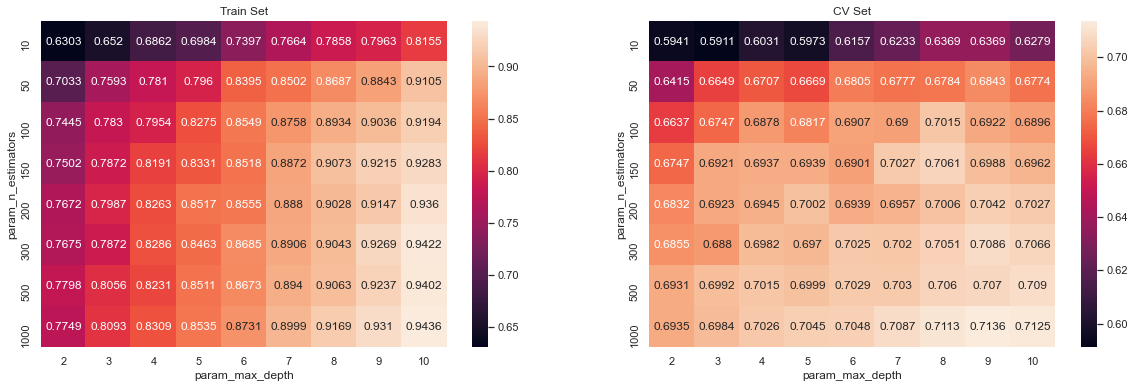

In [71]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

### 3D Scatter Plot

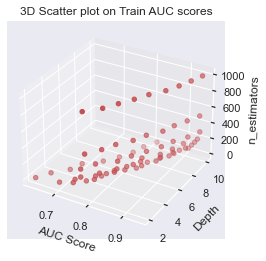

In [72]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(clf.cv_results_['mean_train_score'])     #Train AUC Score
g2 = [2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10] #Depth
g3 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000] #n_estimators



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('n_estimators')

plt.title('3D Scatter plot on Train AUC scores')
plt.show()

In [73]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_bow, y_train))
print(clf.score(X_test_bow, y_test))

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=1000,
                       n_jobs=-1)
0.8960005612898299
0.6910770958333761


In [74]:
max_depth  = clf.best_params_['max_depth']
n_estimators= clf.best_params_['n_estimators']
print(max_depth)
print(n_estimators)

9
1000


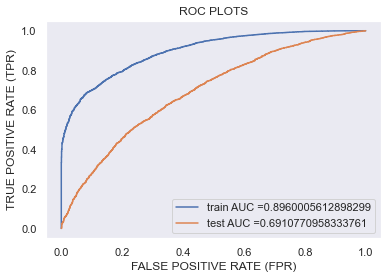

Wall time: 7.85 s


In [75]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':max_depth, 'n_estimators':n_estimators}

rf=RandomForestClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1)
rf.fit(X_train_bow, y_train);

y_train_pred = clf.predict_proba(X_train_bow)[:,1]  
y_test_pred = clf.predict_proba(X_test_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

## Confusion Matrix

In [76]:
# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


In [77]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.6434115409004438 for threshold 0.508
Train confusion matrix
[[1879  382]
 [2811 9639]]


Train data confusion matrix


<AxesSubplot:>

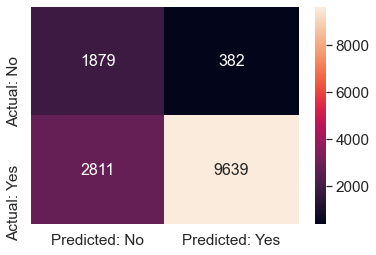

In [78]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [79]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 907  755]
 [2554 6600]]


Test data confusion matrix


<AxesSubplot:>

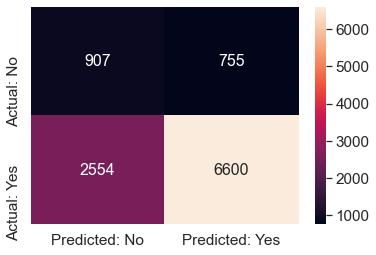

In [80]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

## Applying SET 2

In [81]:
%%time
# Please write all the code with proper documentation
from scipy.sparse import hstack
# Prepare data for TFIDF
X_train_tfidf = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, X_train_essay_tfidf,X_train_titles_tfidf,X_train_summary_tfidf, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cv_tfidf = hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg,X_cv_essay_tfidf,X_cv_titles_tfidf,X_cv_summary_tfidf, X_cv_price_std,X_cv_projects_std,X_cv_qty_std )).tocsr()
X_test_tfidf = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos, X_test_teacher_prefix_neg,X_test_essay_tfidf,X_test_titles_tfidf,X_test_summary_tfidf,X_test_price_std,X_test_projects_std,X_test_qty_std )).tocsr()

print(X_train_tfidf.shape, y_train.shape)
print(X_cv_tfidf.shape, y_cv.shape)
print(X_test_tfidf.shape, y_test.shape)



(14711, 8750) (14711,)
(7247, 8750) (7247,)
(10816, 8750) (10816,)
Wall time: 152 ms


In [82]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf=GridSearchCV(rf, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_tfidf, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200, 300, 500,
                                          1000]},
             return_train_score=True, scoring='roc_auc')

### HeatMap

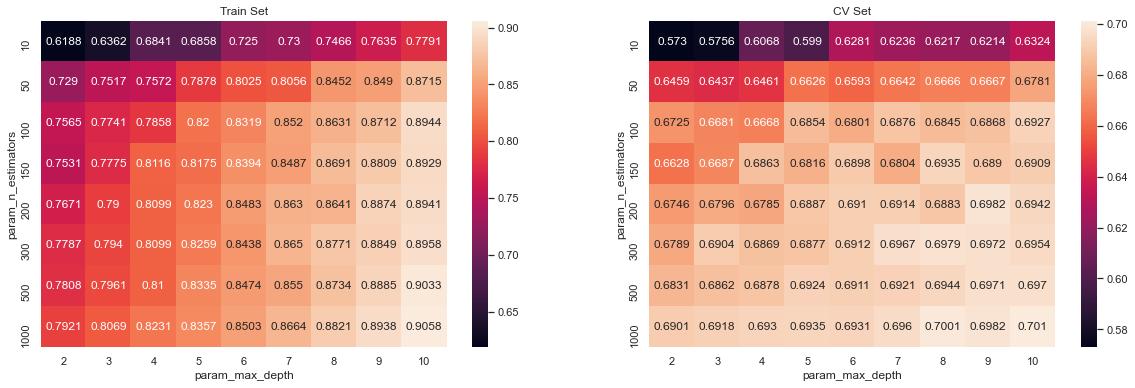

In [83]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

### 3D Scatter Plot

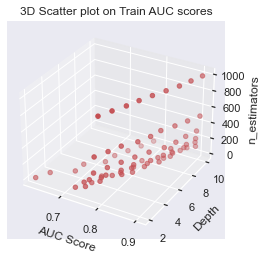

In [84]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(clf.cv_results_['mean_train_score'])     #Train AUC Score
g2 = [2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10] #Depth
g3 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000] #n_estimators



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('n_estimators')

plt.title('3D Scatter plot on Train AUC scores')
plt.show()

In [85]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_tfidf, y_train))
print(clf.score(X_test_tfidf, y_test))

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=1000,
                       n_jobs=-1)
0.8689866764714763
0.6781393626427539


In [86]:
max_depth  = clf.best_params_['max_depth']
n_estimators= clf.best_params_['n_estimators']
print(max_depth)
print(n_estimators)

10
1000


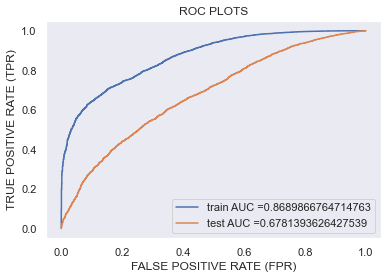

Wall time: 6.69 s


In [87]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':max_depth, 'n_estimators':n_estimators}

rf=RandomForestClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1)
rf.fit(X_train_tfidf, y_train);

y_train_pred = clf.predict_proba(X_train_tfidf)[:,1]  
y_test_pred = clf.predict_proba(X_test_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

In [88]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5979961953075459 for threshold 0.514
Train confusion matrix
[[1904  357]
 [3609 8841]]


Train data confusion matrix


<AxesSubplot:>

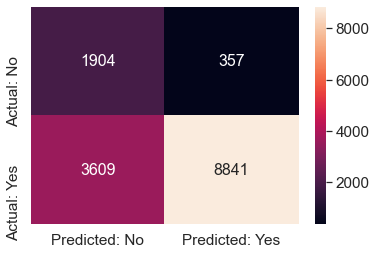

In [89]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [90]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 998  664]
 [3257 5897]]


Test data confusion matrix


<AxesSubplot:>

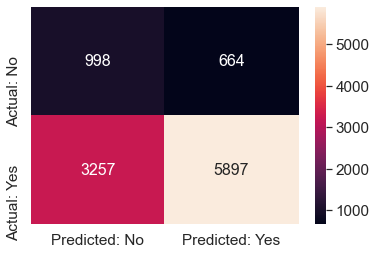

In [91]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

## Applying Random Forest on SET3

In [92]:
%%time
# Please write all the code with proper documentation
from scipy.sparse import hstack
# Prepare data for TFIDF
X_train_avgw2v = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, train_w2v_vectors_essays,train_w2v_vectors_titles,train_w2v_vectors_summary, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cv_avgw2v= hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg,cv_w2v_vectors_essays,cv_w2v_vectors_titles,cv_w2v_vectors_summary,X_cv_price_std,X_cv_projects_std,X_cv_qty_std )).tocsr()
X_test_avgw2v = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos,X_test_teacher_prefix_neg, test_w2v_vectors_essays,test_w2v_vectors_titles,test_w2v_vectors_summary,X_test_price_std,X_test_projects_std,X_test_qty_std )).tocsr()

print(X_train_avgw2v.shape, y_train.shape)
print(X_cv_avgw2v.shape, y_cv.shape)
print(X_test_avgw2v.shape, y_test.shape)



(14711, 163) (14711,)
(7247, 163) (7247,)
(10816, 163) (10816,)
Wall time: 345 ms


In [93]:
%%time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf=GridSearchCV(rf, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_avgw2v, y_train)


Wall time: 20min 15s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200, 300, 500,
                                          1000]},
             return_train_score=True, scoring='roc_auc')

### Heat Map

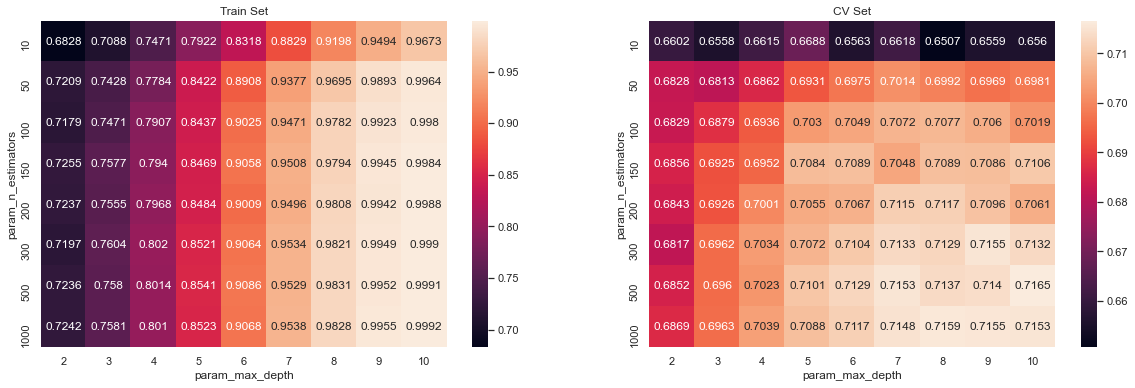

In [94]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()


### 3D Scatter Plot

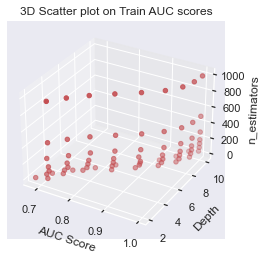

In [95]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(clf.cv_results_['mean_train_score'])     #Train AUC Score
g2 = [2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10] #Depth
g3 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000] #n_estimators



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('n_estimators')

plt.title('3D Scatter plot on Train AUC scores')
plt.show()





In [96]:

# Print params
print(clf.best_estimator_)
print(clf.score(X_train_avgw2v, y_train))
print(clf.score(X_test_avgw2v,y_test))


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=500,
                       n_jobs=-1)
0.9956436093778032
0.6804576957933601


In [97]:
max_depth  = clf.best_params_['max_depth']
n_estimators= clf.best_params_['n_estimators']
print(max_depth)
print(n_estimators)


10
500


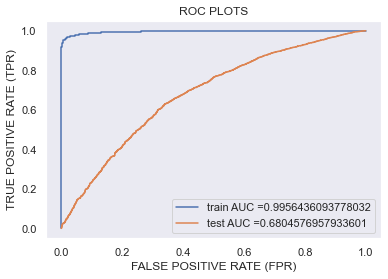

Wall time: 22.4 s


In [98]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':max_depth , 'n_estimators':n_estimators}

rf=RandomForestClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1)
rf.fit(X_train_avgw2v, y_train);

y_train_pred = clf.predict_proba(X_train_avgw2v)[:,1]  
y_test_pred = clf.predict_proba(X_test_avgw2v)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()


In [99]:

#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))


the maximum value of tpr*(1-fpr) 0.9481442799060018 for threshold 0.528
Train confusion matrix
[[ 2226    35]
 [  460 11990]]


Train data confusion matrix


<AxesSubplot:>

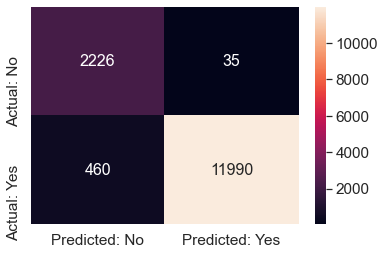

In [100]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')


In [101]:

print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))


Test confusion matrix
[[ 435 1227]
 [ 859 8295]]


Test data confusion matrix


<AxesSubplot:>

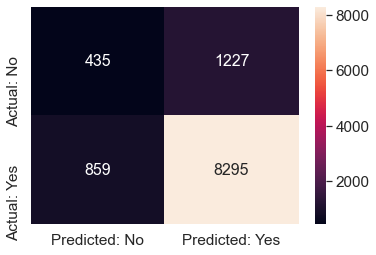

In [102]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')


## Applying Random Forest on SET 4

In [103]:
%%time
# Please write all the code with proper documentation
# Prepare data for TFIDFW2V
X_train_tfidfw2v = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, train_tfidf_w2v_essays,train_tfidf_w2v_titles,train_tfidf_w2v_summary ,X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cv_tfidfw2v = hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg, cv_tfidf_w2v_essays,cv_tfidf_w2v_titles,cv_tfidf_w2v_summary, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_test_tfidfw2v = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos, X_test_teacher_prefix_neg, test_tfidf_w2v_essays,test_tfidf_w2v_titles,test_tfidf_w2v_summary, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()


print(X_train_tfidfw2v.shape)
print(X_cv_tfidfw2v.shape)
print(X_test_tfidfw2v.shape)


(14711, 163)
(7247, 163)
(10816, 163)
Wall time: 225 ms


In [104]:
%%time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf=GridSearchCV(rf, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_tfidfw2v, y_train)


Wall time: 14min 56s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200, 300, 500,
                                          1000]},
             return_train_score=True, scoring='roc_auc')

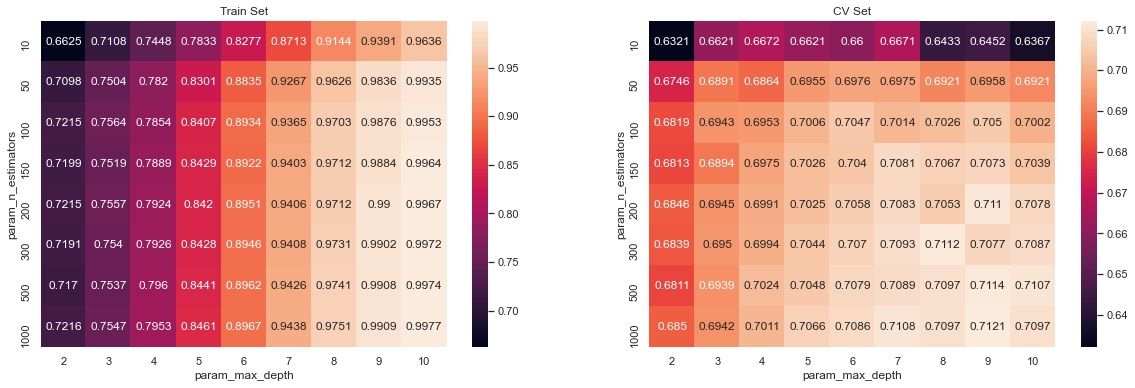

In [105]:

# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()


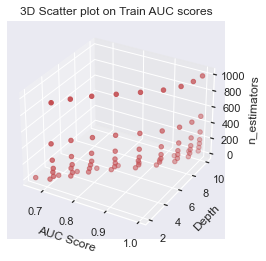

In [106]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(clf.cv_results_['mean_train_score'])     #Train AUC Score
g2 = [2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10] #Depth
g3 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000] #n_estimators



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('n_estimators')

plt.title('3D Scatter plot on Train AUC scores')
plt.show()















In [107]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_tfidfw2v, y_train))
print(clf.score(X_test_tfidfw2v, y_test))


RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=1000,
                       n_jobs=-1)
0.9764009243519856
0.6728944387084799


In [108]:
max_depth  = clf.best_params_['max_depth']
n_estimators= clf.best_params_['n_estimators']
print(max_depth)
print(n_estimators)


9
1000


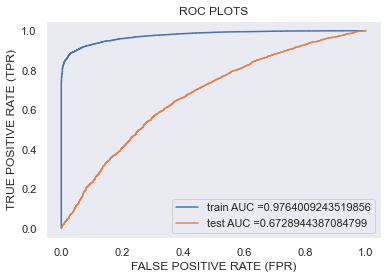

Wall time: 4.72 s


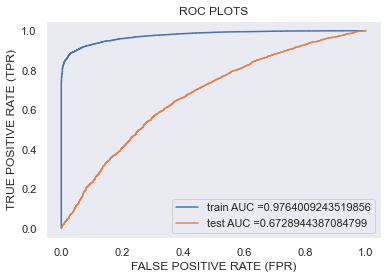

Wall time: 37.4 s


In [110]:

%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':max_depth, 'n_estimators':n_estimators}

rf=RandomForestClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1)
rf.fit(X_train_tfidfw2v, y_train);

y_train_pred = clf.predict_proba(X_train_tfidfw2v)[:,1]  
y_test_pred = clf.predict_proba(X_test_tfidfw2v)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()


In [111]:

#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))



the maximum value of tpr*(1-fpr) 0.8594568632779681 for threshold 0.533
Train confusion matrix
[[ 2194    67]
 [ 1423 11027]]


Train data confusion matrix


<AxesSubplot:>

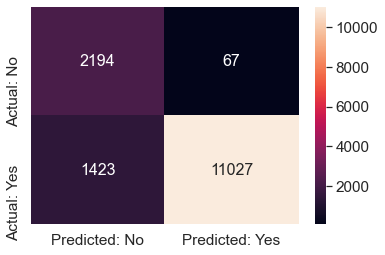

In [112]:

#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')



In [113]:

print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))


Test confusion matrix
[[ 677  985]
 [1726 7428]]


Test data confusion matrix


<AxesSubplot:>

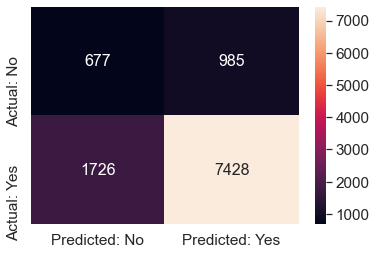

In [114]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')


<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 5.1 Applying XGBOOST on BOW,<font color='black'> SET 1</font>

In [115]:
%%time
# Please write all the code with proper documentation
from scipy.sparse import hstack
# Prepare data for BOW
X_train_bow = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, X_train_essay_bow,X_train_titles_bow,X_train_summary_bow, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cv_bow = hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg,X_cv_essay_bow,X_cv_titles_bow,X_cv_summary_bow, X_cv_price_std,X_cv_projects_std,X_cv_qty_std )).tocsr()
X_test_bow = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos, X_test_teacher_prefix_neg,X_test_essay_bow,X_test_titles_bow,X_test_summary_bow,X_test_price_std,X_test_projects_std,X_test_qty_std )).tocsr()

print(X_train_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)


(14711, 8750) (14711,)
(7247, 8750) (7247,)
(10816, 8750) (10816,)
Wall time: 147 ms


In [116]:
%%time
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

xgb = XGBClassifier(class_weight='balanced', n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf=GridSearchCV(xgb, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_bow, y_train)

Wall time: 25min 17s


GridSearchCV(cv=3, estimator=XGBClassifier(class_weight='balanced', n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200, 300, 500,
                                          1000]},
             return_train_score=True, scoring='roc_auc')

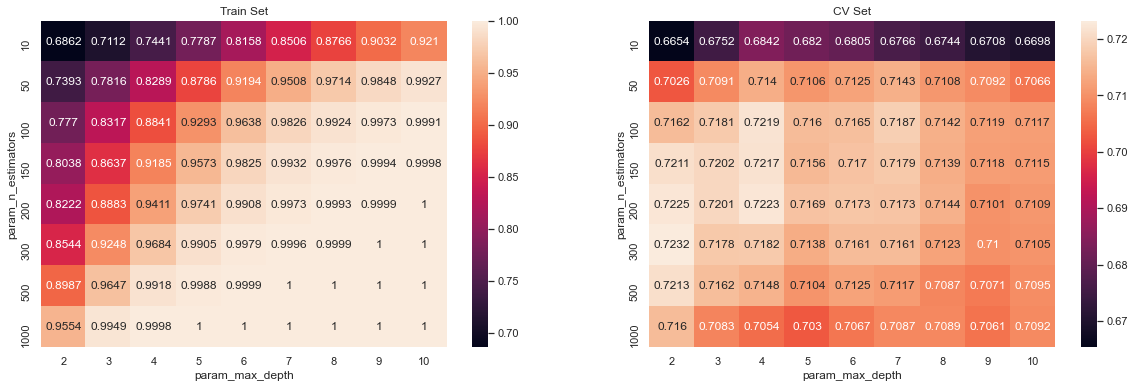

In [117]:

# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()


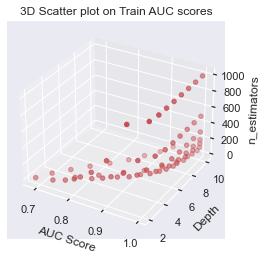

In [118]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(clf.cv_results_['mean_train_score'])     #Train AUC Score
g2 = [2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10] #Depth
g3 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000] #n_estimators



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('n_estimators')

plt.title('3D Scatter plot on Train AUC scores')
plt.show()




In [119]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_bow, y_train))
print(clf.score(X_test_bow, y_test))



XGBClassifier(class_weight='balanced', max_depth=2, n_estimators=300, n_jobs=-1)
0.8262570671895899
0.6961567437985197


In [120]:

max_depth  = clf.best_params_['max_depth']
n_estimators= clf.best_params_['n_estimators']
print(max_depth)
print(n_estimators)



2
300


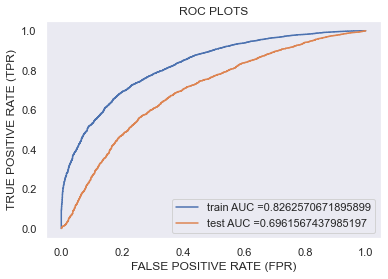

Wall time: 4.48 s


In [121]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'n_estimators':[n_estimators]}
xgb=XGBClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1)
xgb.fit(X_train_bow, y_train);

y_train_pred = clf.predict_proba(X_train_bow)[:,1]  
y_test_pred = clf.predict_proba(X_test_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()


In [122]:

#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))



the maximum value of tpr*(1-fpr) 0.5571308853281325 for threshold 0.832
Train confusion matrix
[[1741  520]
 [3442 9008]]


In [123]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")


Train data confusion matrix


<AxesSubplot:>

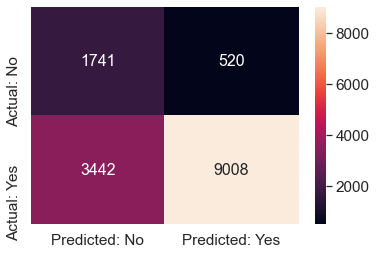

In [124]:
confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')




In [125]:

print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))



Test confusion matrix
[[1091  571]
 [3188 5966]]


Test data confusion matrix


<AxesSubplot:>

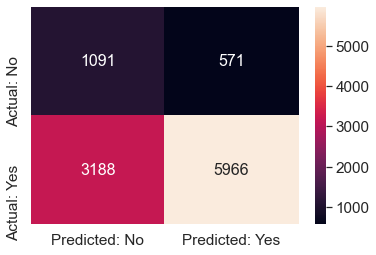

In [126]:

print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')



### 5.2 Applying XGBOOST on TFIDF,<font color='black'> SET 2</font>

In [127]:
%%time
# Please write all the code with proper documentation
from scipy.sparse import hstack
# Prepare data for TFIDF
X_train_tfidf = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, X_train_essay_tfidf,X_train_titles_tfidf,X_train_summary_tfidf, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cv_tfidf = hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg,X_cv_essay_tfidf,X_cv_titles_tfidf,X_cv_summary_tfidf, X_cv_price_std,X_cv_projects_std,X_cv_qty_std )).tocsr()
X_test_tfidf = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos, X_test_teacher_prefix_neg,X_test_essay_tfidf,X_test_titles_tfidf,X_test_summary_tfidf,X_test_price_std,X_test_projects_std,X_test_qty_std )).tocsr()

print(X_train_tfidf.shape, y_train.shape)
print(X_cv_tfidf.shape, y_cv.shape)
print(X_test_tfidf.shape, y_test.shape)



(14711, 8750) (14711,)
(7247, 8750) (7247,)
(10816, 8750) (10816,)
Wall time: 109 ms


In [128]:
%%time
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

xgb = XGBClassifier(class_weight='balanced', n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf=GridSearchCV(xgb, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_tfidf, y_train)


Wall time: 29min 30s


GridSearchCV(cv=3, estimator=XGBClassifier(class_weight='balanced', n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200, 300, 500,
                                          1000]},
             return_train_score=True, scoring='roc_auc')

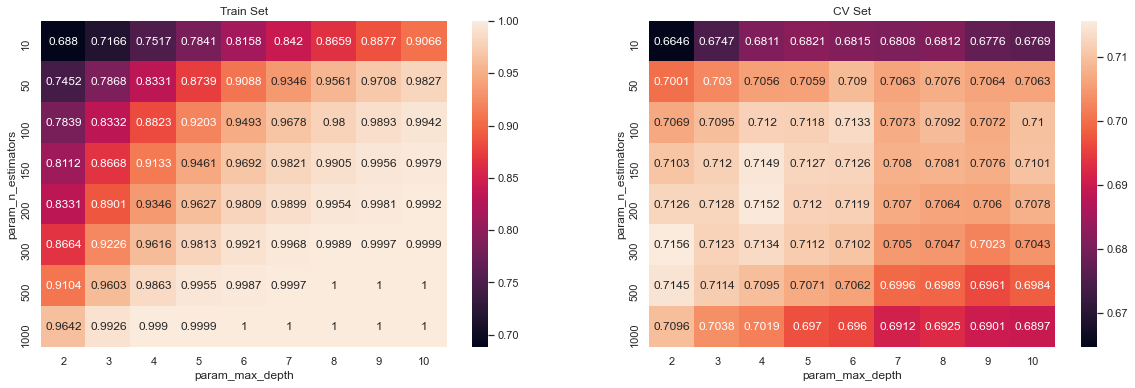

In [129]:

# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()


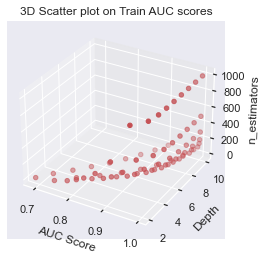

In [130]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(clf.cv_results_['mean_train_score'])     #Train AUC Score
g2 = [2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10] #Depth
g3 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000] #n_estimators



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('n_estimators')

plt.title('3D Scatter plot on Train AUC scores')
plt.show()



In [131]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_tfidf, y_train))
print(clf.score(X_test_tfidf, y_test))


XGBClassifier(class_weight='balanced', max_depth=2, n_estimators=300, n_jobs=-1)
0.8372078140070233
0.6893892696359947


In [132]:
max_depth  = clf.best_params_['max_depth']
n_estimators= clf.best_params_['n_estimators']
print(max_depth)
print(n_estimators)


2
300


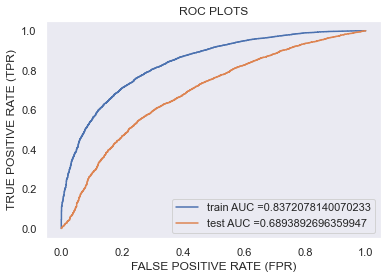

Wall time: 4.56 s


In [133]:

%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'n_estimators':[n_estimators]}
xgb=XGBClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1)
xgb.fit(X_train_tfidf, y_train);

y_train_pred = clf.predict_proba(X_train_tfidf)[:,1]  
y_test_pred = clf.predict_proba(X_test_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()


In [134]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))


the maximum value of tpr*(1-fpr) 0.573154537655265 for threshold 0.825
Train confusion matrix
[[1701  560]
 [2965 9485]]


In [135]:
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")
    

Train data confusion matrix


<AxesSubplot:>

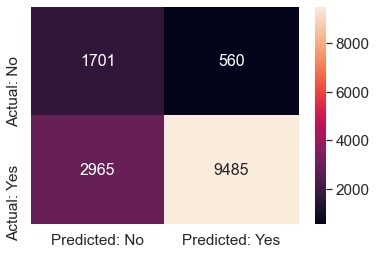

In [136]:
confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')



In [137]:

print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))


Test confusion matrix
[[1001  661]
 [2986 6168]]


Test data confusion matrix


<AxesSubplot:>

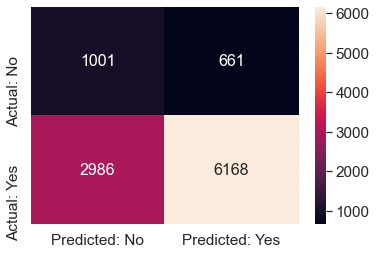

In [138]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')


### 5.3 Applying XGBOOST on AVG W2V,<font color='black'> SET 3</font>

In [139]:
%%time
# Please write all the code with proper documentation
from scipy.sparse import hstack
# Prepare data for TFIDF
X_train_avgw2v = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, train_w2v_vectors_essays,train_w2v_vectors_titles,train_w2v_vectors_summary, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cv_avgw2v= hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg,cv_w2v_vectors_essays,cv_w2v_vectors_titles,cv_w2v_vectors_summary,X_cv_price_std,X_cv_projects_std,X_cv_qty_std )).tocsr()
X_test_avgw2v = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos,X_test_teacher_prefix_neg, test_w2v_vectors_essays,test_w2v_vectors_titles,test_w2v_vectors_summary,X_test_price_std,X_test_projects_std,X_test_qty_std )).tocsr()

print(X_train_avgw2v.shape, y_train.shape)
print(X_cv_avgw2v.shape, y_cv.shape)
print(X_test_avgw2v.shape, y_test.shape)



(14711, 163) (14711,)
(7247, 163) (7247,)
(10816, 163) (10816,)
Wall time: 271 ms


In [140]:
%%time
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

xgb = XGBClassifier(class_weight='balanced', n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf=GridSearchCV(xgb, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_avgw2v, y_train)


Wall time: 39min 38s


GridSearchCV(cv=3, estimator=XGBClassifier(class_weight='balanced', n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200, 300, 500,
                                          1000]},
             return_train_score=True, scoring='roc_auc')

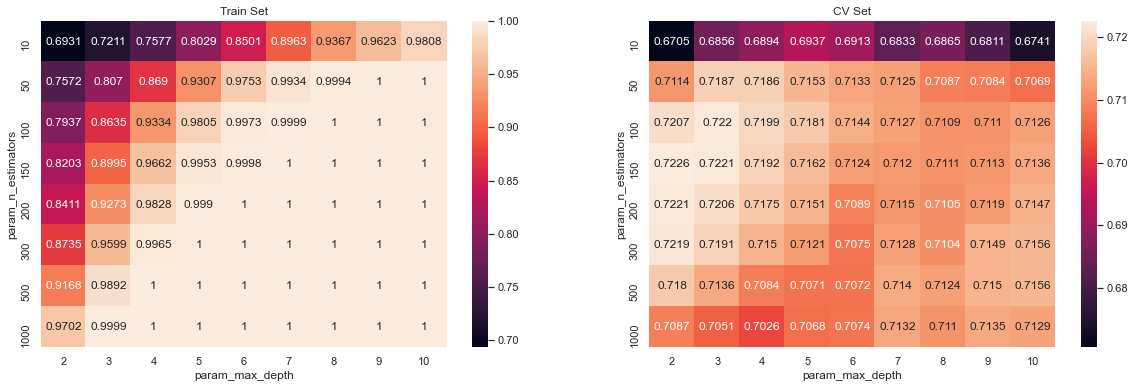

In [141]:

# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()


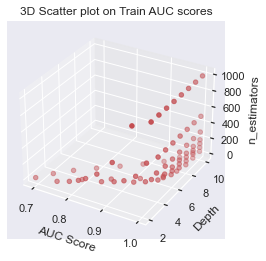

In [142]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(clf.cv_results_['mean_train_score'])     #Train AUC Score
g2 = [2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10] #Depth
g3 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000] #n_estimators



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('n_estimators')

plt.title('3D Scatter plot on Train AUC scores')
plt.show()






In [143]:

# Print params
print(clf.best_estimator_)
print(clf.score(X_train_avgw2v, y_train))
print(clf.score(X_test_avgw2v, y_test))




XGBClassifier(class_weight='balanced', max_depth=2, n_estimators=150, n_jobs=-1)
0.7944067290835167
0.6882428216528674


In [144]:

max_depth  = clf.best_params_['max_depth']
n_estimators= clf.best_params_['n_estimators']
print(max_depth)
print(n_estimators)


2
150


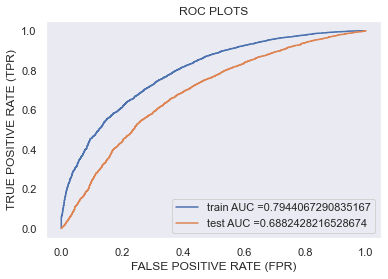

Wall time: 4.34 s


In [145]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'n_estimators':[n_estimators]}
xgb=XGBClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1)
xgb.fit(X_train_avgw2v, y_train);

y_train_pred = clf.predict_proba(X_train_avgw2v)[:,1]  
y_test_pred = clf.predict_proba(X_test_avgw2v)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()


In [146]:

#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))



the maximum value of tpr*(1-fpr) 0.511316562135317 for threshold 0.826
Train confusion matrix
[[1551  710]
 [3170 9280]]


Train data confusion matrix


<AxesSubplot:>

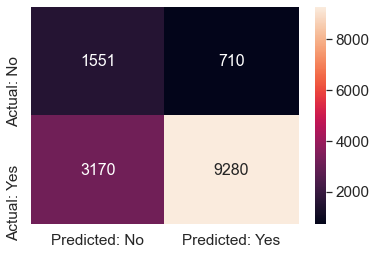

In [147]:

#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')



In [148]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))


Test confusion matrix
[[1029  633]
 [2980 6174]]


Test data confusion matrix


<AxesSubplot:>

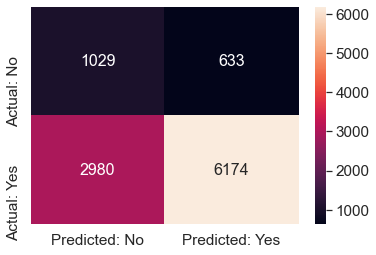

In [149]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')


### 5.4 Applying XGBOOST on TFIDF W2V,<font color='black'> SET 4</font>

In [150]:
%%time
# Please write all the code with proper documentation
# Prepare data for TFIDFW2V
X_train_tfidfw2v = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, train_tfidf_w2v_essays,train_tfidf_w2v_titles,train_tfidf_w2v_summary ,X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cv_tfidfw2v = hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg, cv_tfidf_w2v_essays,cv_tfidf_w2v_titles,cv_tfidf_w2v_summary, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_test_tfidfw2v = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos, X_test_teacher_prefix_neg, test_tfidf_w2v_essays,test_tfidf_w2v_titles,test_tfidf_w2v_summary, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()


print(X_train_tfidfw2v.shape)
print(X_cv_tfidfw2v.shape)
print(X_test_tfidfw2v.shape)


(14711, 163)
(7247, 163)
(10816, 163)
Wall time: 252 ms


In [151]:
%%time
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

xgb = XGBClassifier(class_weight='balanced', n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf=GridSearchCV(xgb, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_tfidfw2v, y_train)



Wall time: 42min 1s


GridSearchCV(cv=3, estimator=XGBClassifier(class_weight='balanced', n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200, 300, 500,
                                          1000]},
             return_train_score=True, scoring='roc_auc')

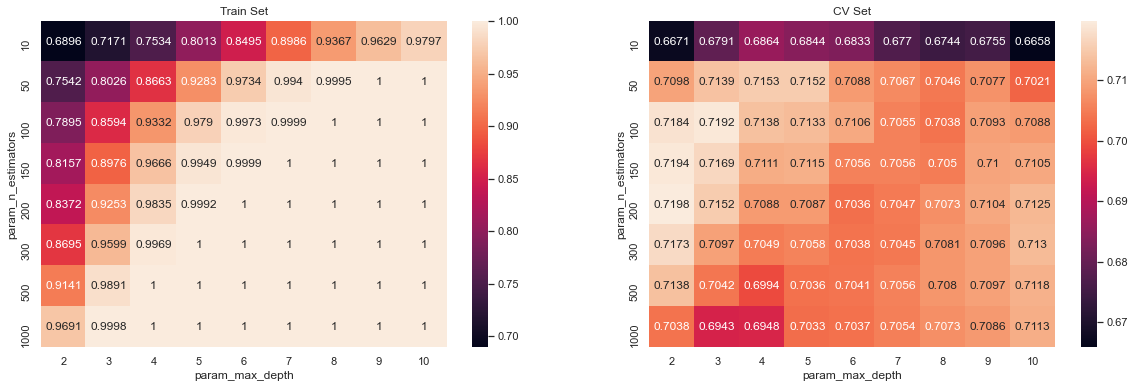

In [152]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()


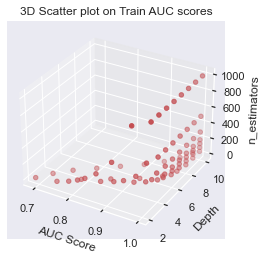

In [153]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

g1 = list(clf.cv_results_['mean_train_score'])     #Train AUC Score
g2 = [2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10] #Depth
g3 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000] #n_estimators



ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('AUC Score')
ax.set_ylabel('Depth')
ax.set_zlabel('n_estimators')

plt.title('3D Scatter plot on Train AUC scores')
plt.show()


In [154]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_tfidfw2v, y_train))
print(clf.score(X_test_tfidfw2v, y_test))


XGBClassifier(class_weight='balanced', max_depth=2, n_estimators=200, n_jobs=-1)
0.8077981985438436
0.6869607744156875


In [155]:
max_depth  = clf.best_params_['max_depth']
n_estimators= clf.best_params_['n_estimators']
print(max_depth)
print(n_estimators)


2
200


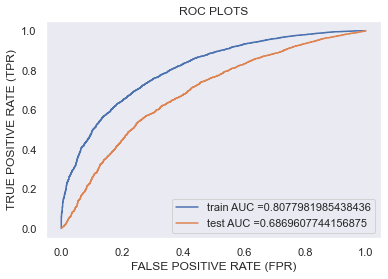

Wall time: 5.3 s


In [156]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'n_estimators':[n_estimators]}
xgb=XGBClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1)
xgb.fit(X_train_tfidfw2v, y_train);

y_train_pred = clf.predict_proba(X_train_tfidfw2v)[:,1]  
y_test_pred = clf.predict_proba(X_test_tfidfw2v)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

In [157]:

#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))


the maximum value of tpr*(1-fpr) 0.5305510409617239 for threshold 0.832
Train confusion matrix
[[1655  606]
 [3426 9024]]


Train data confusion matrix


<AxesSubplot:>

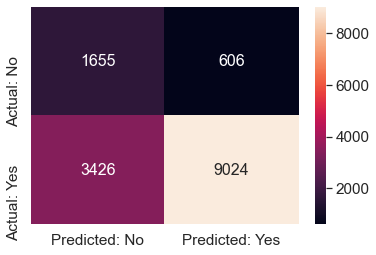

In [158]:

#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')



In [159]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))



Test confusion matrix
[[1053  609]
 [3202 5952]]


Test data confusion matrix


<AxesSubplot:>

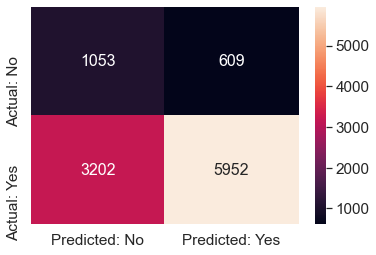

In [160]:

print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')



<h1>3. Conclusion</h1>

In [162]:
# Please compare all your models using Prettytable library
# Please compare all your models using Prettytable library
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "N Estimators", "Max Depth", "AUC"]
x.add_row(["Bag of Words", "Random Forest", 1000, 9, 0.69])
x.add_row(["TFIDF", "Random Forest", 1000, 10, .67])
x.add_row(["AVG W2V", "Random Forest", 500, 10, .68])
x.add_row(["TFIDF W2V", "Random Forest", 1000, 9, .67])
x.add_row(["Bag of Words", "XGBOOST", 300, 2, .69])
x.add_row(["TFIDF", "XGBOOST", 300, 2, .68])
x.add_row(["AVG W2V", "XGBOOST", 150, 2, .68])
x.add_row(["TFIDF W2V", "XGBOOST", 200, 2, 0.68])


print(x)

+--------------+---------------+--------------+-----------+------+
|  Vectorizer  |     Model     | N Estimators | Max Depth | AUC  |
+--------------+---------------+--------------+-----------+------+
| Bag of Words | Random Forest |     1000     |     9     | 0.69 |
|    TFIDF     | Random Forest |     1000     |     10    | 0.67 |
|   AVG W2V    | Random Forest |     500      |     10    | 0.68 |
|  TFIDF W2V   | Random Forest |     1000     |     9     | 0.67 |
| Bag of Words |    XGBOOST    |     300      |     2     | 0.69 |
|    TFIDF     |    XGBOOST    |     300      |     2     | 0.68 |
|   AVG W2V    |    XGBOOST    |     150      |     2     | 0.68 |
|  TFIDF W2V   |    XGBOOST    |     200      |     2     | 0.68 |
+--------------+---------------+--------------+-----------+------+
